In [ ]:
# Libraries

import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
full_data =pd.read_csv('/content/laptopPrice.csv')

# **TRAINING DATA PRE-PROCESSING**

# Data **Shape**

In [ ]:
full_data.shape

(823, 19)

In [ ]:
full_data.head(10)

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0
5,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,22990,3 stars,0,0
6,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,32-bit,0 GB,Casual,No warranty,No,No,21990,3 stars,31,3
7,ASUS,Intel,Core i5,10th,8 GB,DDR4,0 GB,1024 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,58799,3 stars,0,0
8,Lenovo,Intel,Core i5,10th,4 GB,DDR4,0 GB,1024 GB,Windows,32-bit,0 GB,Casual,No warranty,No,No,49999,3 stars,0,0
9,acer,AMD,Ryzen 5,10th,4 GB,DDR4,0 GB,512 GB,Windows,32-bit,4 GB,Casual,No warranty,No,No,59990,4 stars,1946,240


### missing **values**

In [ ]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              823 non-null    object
 1   processor_brand    823 non-null    object
 2   processor_name     823 non-null    object
 3   processor_gnrtn    823 non-null    object
 4   ram_gb             823 non-null    object
 5   ram_type           823 non-null    object
 6   ssd                823 non-null    object
 7   hdd                823 non-null    object
 8   os                 823 non-null    object
 9   os_bit             823 non-null    object
 10  graphic_card_gb    823 non-null    object
 11  weight             823 non-null    object
 12  warranty           823 non-null    object
 13  Touchscreen        823 non-null    object
 14  msoffice           823 non-null    object
 15  Price              823 non-null    int64 
 16  rating             823 non-null    object
 1

In [ ]:
full_data.describe()

,Price,Number of Ratings,Number of Reviews
count,823.000000,823.000000,823.000000
mean,76745.177400,315.301337,37.609964
std,45101.790525,1047.382654,121.728017
min,16990.000000,0.000000,0.000000
25%,46095.000000,0.000000,0.000000
50%,64990.000000,17.000000,2.000000
75%,89636.000000,139.500000,18.000000
max,441990.000000,15279.000000,1947.000000


# **Feature Engineering**

In [ ]:
full_data['processor_info']=full_data['processor_name']+" "+full_data['processor_brand'] + ' '+ full_data['processor_gnrtn']

In [ ]:
full_data['os_info']=full_data['os']+' '+full_data['os_bit']

In [ ]:
full_data['ram_info']=full_data['ram_gb']+' '+full_data['ram_type']

In [ ]:
full_data['review_per_rating']=full_data['Number of Reviews']/full_data['Number of Ratings']

In [ ]:
full_data.drop(['brand','processor_brand','processor_name','processor_gnrtn','ram_gb','ram_type','os',	'os_bit'],axis=1,inplace=True)
full_data

,ssd,hdd,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews,processor_info,os_info,ram_info,review_per_rating
0,0 GB,1024 GB,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0,Core i3 Intel 10th,Windows 64-bit,4 GB DDR4,0.000000
1,0 GB,1024 GB,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5,Core i3 Intel 10th,Windows 64-bit,4 GB DDR4,0.076923
2,0 GB,1024 GB,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1,Core i3 Intel 10th,Windows 64-bit,4 GB DDR4,0.125000
3,512 GB,0 GB,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0,Core i5 Intel 10th,Windows 32-bit,8 GB DDR4,NaN
4,0 GB,512 GB,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0,Celeron Dual Intel Not Available,Windows 64-bit,4 GB DDR4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,1024 GB,0 GB,0 GB,Casual,1 year,No,No,135990,3 stars,0,0,Ryzen 9 AMD Not Available,Windows 64-bit,4 GB DDR4,NaN
819,1024 GB,0 GB,0 GB,Casual,1 year,No,No,144990,3 stars,0,0,Ryzen 9 AMD Not Available,Windows 64-bit,4 GB DDR4,NaN
820,1024 GB,0 GB,4 GB,Casual,1 year,No,No,149990,3 stars,0,0,Ryzen 9 AMD Not Available,Windows 64-bit,4 GB DDR4,NaN
821,1024 GB,0 GB,4 GB,Casual,1 year,No,No,142990,3 stars,0,0,Ryzen 9 AMD Not Available,Windows 64-bit,4 GB DDR4,NaN


## **Convert categorical variables into 'dummy' or indicator variables**

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(full_data[['ssd', 'hdd', 'graphic_card_gb', 'weight', 'warranty', 'Touchscreen', 'msoffice', 'processor_info', 'os_info', 'ram_info', 'rating']])
encoded_full_data =pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(['ssd', 'hdd', 'graphic_card_gb', 'weight', 'warranty', 'Touchscreen', 'msoffice', 'processor_info', 'os_info', 'ram_info', 'rating']))
full_data = pd.concat([full_data, encoded_full_data], axis=1)
full_data

,ssd,hdd,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,...,ram_info_8 GB DDR4,ram_info_8 GB DDR5,ram_info_8 GB LPDDR3,ram_info_8 GB LPDDR4,ram_info_8 GB LPDDR4X,rating_1 star,rating_2 stars,rating_3 stars,rating_4 stars,rating_5 stars
0,0 GB,1024 GB,0 GB,Casual,No warranty,No,No,34649,2 stars,3,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0 GB,1024 GB,0 GB,Casual,No warranty,No,No,38999,3 stars,65,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0 GB,1024 GB,0 GB,Casual,No warranty,No,No,39999,3 stars,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,512 GB,0 GB,2 GB,Casual,No warranty,No,No,69990,3 stars,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0 GB,512 GB,0 GB,Casual,No warranty,No,No,26990,3 stars,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,1024 GB,0 GB,0 GB,Casual,1 year,No,No,135990,3 stars,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
819,1024 GB,0 GB,0 GB,Casual,1 year,No,No,144990,3 stars,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
820,1024 GB,0 GB,4 GB,Casual,1 year,No,No,149990,3 stars,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
821,1024 GB,0 GB,4 GB,Casual,1 year,No,No,142990,3 stars,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
full_data.drop(['ssd',	'hdd',	'graphic_card_gb'	,'weight'	,'warranty'	,'Touchscreen','processor_info', 'os_info', 'ram_info', 'rating','msoffice'],axis =1,inplace =True)

In [ ]:
full_data.dropna(inplace=True)


### **Target Variable Splitting**

In [ ]:
x=full_data.drop(['Price'],axis = 1)
y=full_data['Price']

In [ ]:
print(x.shape)
print(y.shape)

(567, 85)
(567,)


## **Data Transformation**

In [ ]:
from sklearn import preprocessing
pre_process=preprocessing.StandardScaler().fit(x)
x_transform=pre_process.fit_transform(x)
x_transform

array([[-0.36814564, -0.38077066, -1.1580719 , ..., -0.45146612,
        -1.89993581, -0.17040573],
       [-0.31794319, -0.3458957 , -0.54099832, ...,  2.21500564,
        -1.89993581, -0.17040573],
       [-0.36409706, -0.37379567, -0.15532733, ...,  2.21500564,
        -1.89993581, -0.17040573],
       ...,
       [-0.33494724, -0.29707074,  1.02973443, ..., -0.45146612,
         0.52633357, -0.17040573],
       [-0.32118205, -0.29009575,  0.5515254 , ..., -0.45146612,
         0.52633357, -0.17040573],
       [-0.35599989, -0.35287069,  0.62458511, ..., -0.45146612,
         0.52633357, -0.17040573]])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=101)

# **Random Forest**

## **Model Training**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf_regressor = RandomForestRegressor()
rf_regressor.fit(x_train,y_train)

#Predicting the SalePrices using test set
y_pred_rf = rf_regressor.predict(x_test)
RFr = mean_squared_error(y_pred_rf,y_test)
#Random Forest Regression Accuracy with test set
print('Random Forest Regression : ',RFr)

Random Forest Regression :  1093455175.0524197


## **Model Testing**

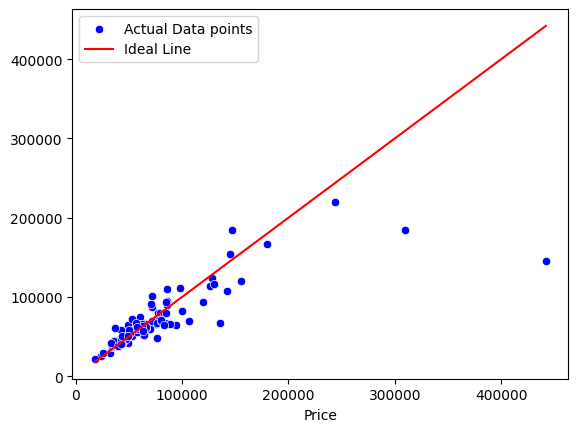

In [ ]:
sns.scatterplot(x=y_test, y=y_pred_rf, color='blue', label='Actual Data points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Line')
plt.legend()
plt.show()

In [ ]:
results= np.column_stack((y_test,y_pred_rf))
print('actual values | Predicted values')
print('---------------------------------------')
for actual ,predicted in results:
  print(f"{actual:14.2f} |  {predicted:12.2f}")

actual values | Predicted values
---------------------------------------
      39990.00 |      38327.30
      85990.00 |     110068.93
      67990.00 |      63338.79
      48990.00 |      41432.48
      64990.00 |      64669.45
      63990.00 |      65904.99
      35590.00 |      39394.84
      54990.00 |      61337.81
      53690.00 |      62173.76
      84086.00 |      67001.46
      76990.00 |      79364.95
     243990.00 |     219530.00
      38900.00 |      39685.58
      49990.00 |      57941.49
      94190.00 |      64370.34
     146490.00 |     184222.01
      49279.00 |      64836.93
      53190.00 |      72087.56
      37990.00 |      38516.47
     144690.00 |     153911.65
      36990.00 |      39277.42
     141990.00 |     106948.06
      23990.00 |      25159.14
      52990.00 |      50495.47
      41990.00 |      47256.52
      44490.00 |      45767.10
      41890.00 |      40903.98
      74990.00 |      65914.93
      43400.00 |      41057.18
      41990.00 |      45597.

# **Gradient Boosting Regression**

## **Model Training**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
gb_regressor = GradientBoostingRegressor()
gb_regressor.fit(x_train,y_train)

#Predicting the SalePrices using test set
y_pred_gb = gb_regressor.predict(x_test)

#Random Forest Regression Accuracy with test set
GBr = mean_squared_error(y_pred_gb,y_test)
print('Gradient Boosting Regression : ',GBr)

Gradient Boosting Regression :  1212347501.4473248


## **Model Testing**

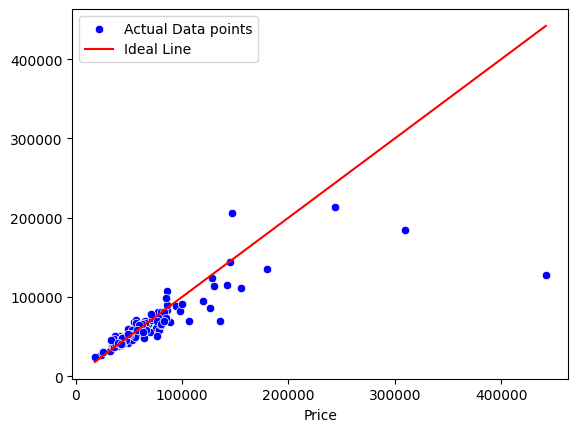

In [ ]:
sns.scatterplot(x=y_test, y=y_pred_gb, color='blue', label='Actual Data points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Line')
plt.legend()
plt.show()

In [ ]:
results= np.column_stack((y_test,y_pred_gb))
print('actual values | Predicted values')
print('---------------------------------------')
for actual ,predicted in results:
  print(f"{actual:14.2f} |  {predicted:12.2f}")

actual values | Predicted values
---------------------------------------
      39990.00 |      39850.37
      85990.00 |     107615.82
      67990.00 |      66242.45
      48990.00 |      42488.12
      64990.00 |      62867.64
      63990.00 |      61251.12
      35590.00 |      37644.18
      54990.00 |      68068.34
      53690.00 |      58350.48
      84086.00 |      71265.69
      76990.00 |      80437.80
     243990.00 |     212931.43
      38900.00 |      41717.47
      49990.00 |      53099.60
      94190.00 |      88324.38
     146490.00 |     206010.09
      49279.00 |      59071.17
      53190.00 |      58774.93
      37990.00 |      40482.40
     144690.00 |     144511.61
      36990.00 |      37557.42
     141990.00 |     114838.24
      23990.00 |      26168.76
      52990.00 |      46177.21
      41990.00 |      50889.89
      44490.00 |      49955.38
      41890.00 |      43940.71
      74990.00 |      60641.47
      43400.00 |      39488.45
      41990.00 |      48294.